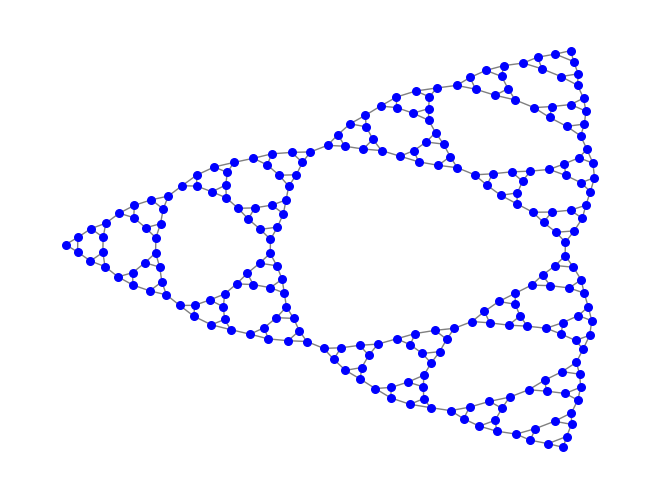

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product

class HanoiTower:
    def __init__(self, disks, towers, layout='kamada-kawai'):
        self.disks = disks
        self.towers = towers
        self.nums = ''.join(str(i) for i in range(1, towers + 1))
        self.nodes = product(self.nums, repeat=disks)
        self.graph = nx.Graph()
        # self.layout = layout

    def diff_count(self, a, b):
        return sum(i != j for i, j in zip(a, b))

    def create_graph(self):
        for node in self.nodes:
            self.graph.add_node(''.join(node))
        for first in self.graph.nodes:
            for second in self.graph.nodes:
                if self.diff_count(first, second) == 1:
                    f_lst, s_lst = list(first), list(second)
                    for i, num in enumerate(f_lst):
                        if num not in f_lst[i + 1:] and s_lst[i] != num and s_lst[i] not in s_lst[i + 1:]:
                            self.graph.add_edge(first, second)
                            break

    def plot(self):
        pos = nx.kamada_kawai_layout(self.graph)
        nx.draw(self.graph, pos, node_size=30, font_size=10, edge_color='grey', node_color='blue')
        plt.show()

if __name__ == "__main__":
    hanoi = HanoiTower(5, 3)
    hanoi.create_graph()
    hanoi.plot()
